# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Выполнять наше исследование будем в следующем порядке:

1. Подробно изучим файл с данными
2. Обработаем пропуски и сделаем проверку типов данных
3. Удалим дубликаты
4. Сделаем расчет и добавление недостающих параметров
5. Подготовим графическое представление результатов
6. Сделаем конечный вывод

## Оглавление

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропущенных значений](#null)
    * [Обработка дубликатов](#dubl)
    * [Замена типов данных](#change)
3. [Подсчет и добавление данных](#add)
4. [Исследовательский анализ данных](#research)
    * [Гистограммы основных параметров](#add_hist)
    * [Изучение времени продажи](#time_sale)
    * [Влияние разных факторов на стоимость кваритиры](#influence)
    * [Топ 10 населенных пунктов](#top10)
    * [Квартиры в центре Санкт-Петербурга](#centr_piter)
5. [Общий вывод](#finish)

## <a id="start">Шаг 1. Открытие файла с данными и изучение общей информации. 

In [1]:
#импорт библиотеки pandas
import pandas as pd
#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
#импорт библиотеки nampy
import numpy as np

In [3]:
# чтение файла  данных,разелитель - "\t"
realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',' ) 
# получение общей информаци о таблице и вывод первых 10 строк
realty.info() 
#выведем случайные 10 строк
realty.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21980,20,10100000.0,99.0,2018-02-28T00:00:00,3,2.8,7.0,49.0,7,NaN,...,16.0,NaN,Петергоф,44949.0,48374.0,0.0,NaN,0.0,NaN,84.0
11416,15,3800000.0,30.5,2017-08-04T00:00:00,1,2.5,9.0,17.7,2,NaN,...,6.2,NaN,Санкт-Петербург,37652.0,10124.0,0.0,NaN,0.0,NaN,277.0
23475,9,3600000.0,39.0,2017-10-27T00:00:00,1,2.65,14.0,20.0,14,NaN,...,11.0,1.0,Санкт-Петербург,17202.0,15998.0,1.0,636.0,2.0,132.0,142.0
9707,15,3350000.0,43.5,2019-04-24T00:00:00,2,2.5,5.0,28.2,5,NaN,...,5.5,1.0,Санкт-Петербург,18574.0,21999.0,0.0,NaN,2.0,699.0,NaN
22795,17,3200000.0,33.0,2018-07-10T00:00:00,1,2.5,14.0,17.3,6,NaN,...,7.5,NaN,Санкт-Петербург,52533.0,16758.0,0.0,NaN,2.0,440.0,9.0
10058,9,3350000.0,25.0,2018-09-10T00:00:00,1,2.65,NaN,17.0,21,NaN,...,3.5,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.000000000000004
5048,18,4490000.0,57.1,2016-01-31T00:00:00,2,3.0,12.0,32.6,1,False,...,10.3,0.0,Санкт-Петербург,29820.0,11503.0,1.0,359.0,1.0,721.0,181.00000000000003
9501,1,5324000.0,60.5,2015-03-12T00:00:00,2,2.75,24.0,32.0,21,False,...,11.9,NaN,Санкт-Петербург,22212.0,17399.0,0.0,NaN,1.0,233.0,1355.0
13197,20,4195000.0,38.5,2018-10-02T00:00:00,1,2.65,16.0,20.1,4,NaN,...,10.3,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,37.0
19417,5,11464000.0,65.4,2018-09-14T00:00:00,1,2.75,20.0,21.59,17,NaN,...,23.53,NaN,Санкт-Петербург,39106.0,10330.0,2.0,386.0,3.0,94.0,93.0


### Вывод

В таблице 22 столбца, они имеют разные типы данных: object, int, bool. Количество значений в столбцах различается, следовательно, в данных есть пропущенные значения.  Частично не заполненны данные в ceiling_height, floors_total, living_area, kitchen_area,locality_name,airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest,days_exposition,   is_apartment (много пропусков, вероятно,где пропусти - это не аппартамента и тип сейча object лучше сделать bool), balcony - где пропуске скорее всего нет балконов, нужно заменить на 0. В файле данных много пропущенных значений, выделим данные с короыми нужно работать в первую очередь. Для исследования особенно ценны столбцы: 
Интерпритация названия столбцов realty таблицы:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## <a id="preprocessing">Шаг 2. Предобработка данных

### <a id="null">Обработка пропусков

In [4]:
#вывляем количество пропусков
realty.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Нет зависимости отсутствия значения в floors_total от floor. К сожалению придется удалить записи, где нет площади, так как нельзя сейчас точно сказать как коррелируется общая и жилая площадь. Удалим строки с пропущенной локацией, таких у нас меньше 1%

In [5]:
realty.dropna(subset=['floors_total', 'living_area', 'locality_name'],inplace=True)

В конечных задачах нашего исследования не используются некоторые столбцы - удалим их. Расстояние до аэропорта, парки и водоемы в вопросах данного исследования не играют роли.

In [6]:
#Удаляем не используемые столбцы
realty.drop(['airports_nearest', 'parks_around3000', 'parks_nearest','ponds_around3000', 
             'ponds_nearest'], axis='columns', inplace=True)

Не находится взаимосявязи пропусков в столбце количества дней публикации с остальными значениями, заменяем 0

In [7]:
#пропуски days_exposition заменяем на 0
realty['days_exposition'] = realty['days_exposition'].fillna(0)

Можно предположить, что там где не заполнено поле "балконы" люди просто не заполняли значение, так как их нет, поэтому заменяем нулями. Тоже самое с полем аппартаментов: если это не аппартаменты, это поле не заполнялось  - меняем на нули

In [8]:
# is_apartment и balcony пропущенные значения заменим 0
realty['is_apartment'] = realty['is_apartment'].fillna(0)
realty['balcony'] = realty['balcony'].fillna(0)

Вероятнее всего растояние до центра не считается, так как это ЛО. заменяем нулями

In [9]:
realty[realty['cityCenters_nearest'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,0,False,False,9.1,0,городской посёлок Янино-1,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,0,False,False,8.81,0,посёлок Мурино,NaN,189.00000000000003
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,NaN,5.0,30.0,5,0,False,False,9.0,0.0,Сертолово,NaN,90.00000000000001
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,0,False,False,11.0,2.0,деревня Кудрово,NaN,60.0
38,10,3150000.0,40.0,2018-03-29T00:00:00,1,2.75,18.0,16.3,9,0,False,False,11.6,0,посёлок Мурино,NaN,103.0


In [10]:
#замена расстояния для центра 0
realty['cityCenters_nearest'] = realty['cityCenters_nearest'].fillna(0)

Предположим, что высота потолков в зданиях одинаковой этажности должна быть примерно равна. За исключением разве что элитного жилья в многоэтажных домах с высокими потолками. Поэтому заменим пропущенные значения в столбце высоты потолков на медианные для домов каждой этажности. 

In [11]:
#Циклом заменяем пустые значения в столбце высоты потолка в завизимости от этажности здания
realty['floors_total'].unique()
for flr in realty['floors_total'].unique():
    realty.loc[(realty['ceiling_height'].isna())&(realty['floors_total']== flr), 'ceiling_height'] = \
    realty.loc[realty['floors_total']== flr, 'ceiling_height'].median()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Обычно в 5-этажках и 9-этажках площадь кухни очень похожа. Заменим пропущенные значение в столбце площади кухни медианным, в зависимости от этажности здания. 

In [12]:
# заменяем пустые значения в столбце с площадью кухни на медиану по этажности
for flr in realty['floors_total'].unique():
    realty.loc[(realty['kitchen_area'].isna())&(realty['floors_total']== flr), 'kitchen_area'] = \
    realty.loc[realty['floors_total']== flr, 'kitchen_area'].median()

In [13]:
#прверяем пропуски
realty.isnull().sum() 

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          1
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            1
balcony                 0
locality_name           0
cityCenters_nearest     0
days_exposition         0
dtype: int64

In [14]:
#смотрим какие строки остались с пропусками
realty[realty['kitchen_area'].isnull()].head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
1697,11,3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34.0,18.0,23,0,False,False,NaN,0,Санкт-Петербург,20444.0,410.0


In [15]:
#смотрим какие строки остались с пропусками
realty[realty['ceiling_height'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,20444.0,53.0


In [16]:
#удалим эти строки
realty.dropna(subset=['kitchen_area', 'ceiling_height'],inplace=True)

In [17]:
#проверяем пропуски методои инфо
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21698 entries, 0 to 23698
Data columns (total 17 columns):
total_images            21698 non-null int64
last_price              21698 non-null object
total_area              21698 non-null object
first_day_exposition    21698 non-null object
rooms                   21698 non-null int64
ceiling_height          21698 non-null object
floors_total            21698 non-null object
living_area             21698 non-null object
floor                   21698 non-null int64
is_apartment            21698 non-null object
studio                  21698 non-null bool
open_plan               21698 non-null bool
kitchen_area            21698 non-null object
balcony                 21698 non-null object
locality_name           21698 non-null object
cityCenters_nearest     21698 non-null object
days_exposition         21698 non-null object
dtypes: bool(2), int64(3), object(12)
memory usage: 2.7+ MB


В общей сложности пришлось убрать порядка 8% данных

### <a id="dubl">Обработка дубликатов

In [18]:
realty.duplicated().sum()

0

Дубликатов нет

### <a id="null">Изменение типов данных

In [19]:
#заменяем строковые значения на целочисленные
realty[['last_price', 'total_area',  'ceiling_height', 'floors_total', 'living_area', 'kitchen_area','balcony', 
        'cityCenters_nearest','days_exposition']] = realty[['last_price', 'total_area',  'ceiling_height', 'floors_total', 
                                                            'living_area', 'kitchen_area','balcony', 'cityCenters_nearest',
                                                            'days_exposition']].apply(pd.to_numeric, errors='coerce')
realty[['last_price', 'floors_total','balcony', 'cityCenters_nearest',
        'days_exposition']] = realty[['last_price', 'floors_total','balcony', 'cityCenters_nearest',
                                      'days_exposition']].astype('int')

#признак аппартаментов приведем к булеву
realty['is_apartment'] = pd.to_numeric(realty['is_apartment'], errors='coerce')
realty['is_apartment'] = realty['is_apartment'].astype('bool')

#работа с датой
realty['first_day_exposition']  = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#выводим информацию о данных
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21698 entries, 0 to 23698
Data columns (total 17 columns):
total_images            21698 non-null int64
last_price              21698 non-null int64
total_area              21698 non-null float64
first_day_exposition    21698 non-null datetime64[ns]
rooms                   21698 non-null int64
ceiling_height          21698 non-null float64
floors_total            21698 non-null int64
living_area             21698 non-null float64
floor                   21698 non-null int64
is_apartment            21698 non-null bool
studio                  21698 non-null bool
open_plan               21698 non-null bool
kitchen_area            21698 non-null float64
balcony                 21698 non-null int64
locality_name           21698 non-null object
cityCenters_nearest     21698 non-null int64
days_exposition         21698 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 2.5+ MB


**Вывод**

На данном этаме мы обработали пропуски в столбцах высоты потолков и площади кухни, заменив их меданными значениями для зданий одинаковой этажности. Удалили строки, где не было известна общая площадь и название населенного пункта. Также удалили столбцы с информацией о удаленности от аэропорта, парках и водоемах, так как в конечных задачах нашего исследования они не используются. После этого проверили таблицу на наличие дубликатов и заменили типы данных на float, int, datetime и bool где было нужно.
После всех изменений у нас осталось 92% данных.

## <a id="add">Шаг 3. Посчет и добавление данных в таблицу

Для нашего исследования добавим в таблицу следующие значения:
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры по категориям:первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
#цена квадратного метра
realty['price_metr'] = realty['last_price'] / realty['total_area']

In [21]:
#день недели, месяц и год публикации объявления
realty['day'] = pd.DatetimeIndex(realty['first_day_exposition']).day
realty['month'] = pd.DatetimeIndex(realty['first_day_exposition']).month
realty['year'] = pd.DatetimeIndex(realty['first_day_exposition']).year

#добавляем столбец дня недели
realty['weekday'] = pd.DatetimeIndex(realty['first_day_exposition']).weekday

In [22]:
#функция для категории этажа
def category_floor(df):
    floors_total = df['floors_total']
    floor = df['floor']
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'

#добавляем столбец
realty['floor_category'] = realty.apply(category_floor, axis=1)

In [23]:
#соотношение жилой и общей площади 
realty['living_to_total'] = realty['living_area'] / realty['total_area']

#отношение площади кухни к общей 
realty['kitchen_to_total'] = realty['kitchen_area'] / realty['total_area']

In [24]:
realty.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,days_exposition,price_metr,day,month,year,weekday,floor_category,living_to_total,kitchen_to_total
23258,12,3000000,42.5,2018-01-09,1,2.65,12,14.7,6,False,...,0,208,70588.235294,9,1,2018,1,другой,0.345882,0.343529
21281,20,11999000,104.1,2018-07-19,4,3.00,6,68.9,4,False,...,4663,192,115264.169068,19,7,2018,3,другой,0.661864,0.116234
11590,20,5250000,64.0,2019-03-15,3,2.50,9,41.0,7,False,...,31240,0,82031.250000,15,3,2019,4,другой,0.640625,0.156250
20114,5,5700000,54.3,2019-01-02,2,2.75,25,30.5,25,False,...,0,60,104972.375691,2,1,2019,2,последний,0.561694,0.224309
23436,17,5350000,55.5,2019-03-27,3,2.55,5,40.0,4,False,...,14535,14,96396.396396,27,3,2019,2,другой,0.720721,0.108108


**Вывод**

На данном этапе мы добавили данные о цене квадратного метра, дату публикации  объявления разделили на три отдельных столбца (день, месяци, год), разделили данные по категории в зависимости от этажа квартиры и дабваили соотношение жилой площади к общей и площади кухни к общей.


## <a id="research">Шаг 4. Исследовательский анализ данных

### <a id="add_hist">Построение гистограмм по параметрам

Переходим к анализу данных. Для этого построим ряд графиков:
* Гистограммы для площади, цены, числа комнат, высоты потолков
* Гистограмму времени продажи квартир 

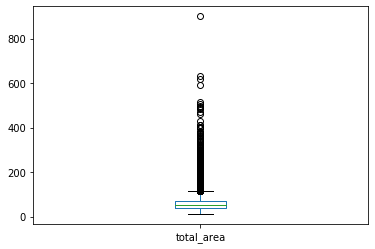

In [25]:
#строим график размаха
realty.total_area.plot.box()

Видим много выбросовы выше межквартильного размаха

In [26]:
#Рассмотрим числовое описание данных общей площади, цены, числа комнат и высоты потолков
realty['total_area'].describe()

count    21698.000000
mean        60.061078
std         34.698368
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

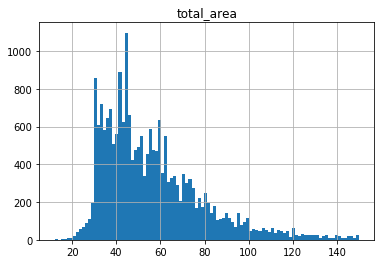

In [27]:
#Выводим гистограммы для значений общей площади, цены, числа комнат и высоты потолков
realty.hist('total_area', bins= 100, range = (12, 150))
plt.show()

In [28]:
realty['last_price'].describe().apply('{0:.5f}'.format)

count        21698.00000
mean       6499807.03171
std       10885124.49335
min          12190.00000
25%        3450000.00000
50%        4650000.00000
75%        6750000.00000
max      763000000.00000
Name: last_price, dtype: object

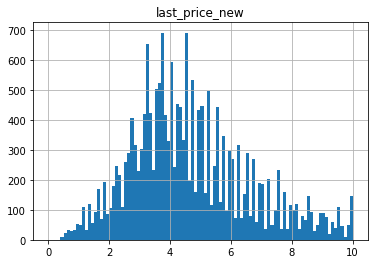

In [29]:
#создадим дополнительный столбец цены разделенный на 1 млн. для лучшего понимания графика
realty['last_price_new'] = realty['last_price'] / 1000000
realty.hist('last_price_new', bins= 100, range = (0, 10))
plt.show()

In [30]:
realty['rooms'].describe()

count    21698.000000
mean         2.071573
std          1.080607
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

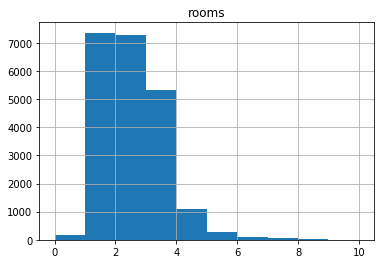

In [31]:
realty.hist('rooms', bins= 10, range=(0,10))
plt.show()

In [32]:
realty['ceiling_height'].describe()

count    21698.000000
mean         2.738027
std          1.036750
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

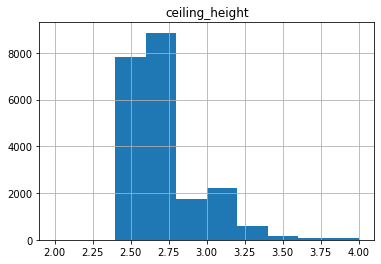

In [33]:
realty.hist('ceiling_height', bins= 10, range = (2, 4))
plt.show()

**Вывод по гистограммам**

На данном этами гистограммы по основным параметрам дали нам визуальное представление о результатах. Так можно сказать, что большинство квартир в наших данных 40-69 квадратных метров. Стоимость квартир очень вариативна, в каждом квартиле есть свои выбросы. Можно сказать, что средняя стоимость квартир 3,5-6 млн.рублей. По количеству комнат объявление по продаже квартир больше 4 комнат уже редкость. И высота потолков в большинстве случаев 2,6-2,8 метров. 

## <a id="time_sale">Изучение времени продажи 

Изучим время продажи квартир. Построим гистограмму по месяцам публикаций объявлений и построим график продолжительность публикаций.

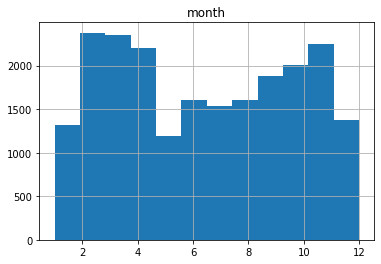

In [34]:
#гистограмма по месяцу публикации
realty.hist('month', bins=12)
plt.show()

Рассмотрим срок публикации объявлений. При построении графика отбросим нулевые значения.

In [35]:
realty['days_exposition'].describe()

count    21698.000000
mean       159.400083
std        215.229849
min          0.000000
25%         21.000000
50%         77.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [36]:
# расчет межквартильного размаха
q1=realty.days_exposition.quantile(0.25)
q3=realty.days_exposition.quantile(0.75)
iqr=q3-q1
realty_days= realty.query('days_exposition <= @q3+1.5*@iqr')
'мы отрезаем {:.1%} данных'.format(1-realty_days.shape[0] / realty.shape[0])

'мы отрезаем 8.3% данных'

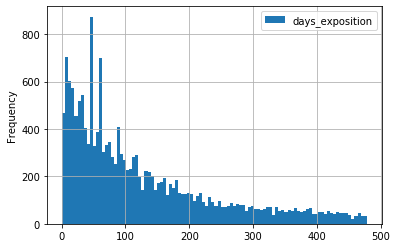

In [37]:
#ограничем график значением равным третьему квартилю плюс 1.5 межквартильнам растоянием(478,5)
realty_days.query('days_exposition != 0').plot(y='days_exposition', kind='hist', bins=100, grid=True)
plt.show()

На графике есть характерные выбросы, рассмотрим эти  промежутки подробнее.

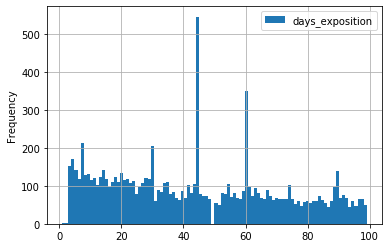

In [38]:
realty.query('days_exposition != 0 and days_exposition <100').plot(y='days_exposition', kind='hist', bins=100, grid=True)
plt.show()

Убераем редкие и выбивающиеся значения

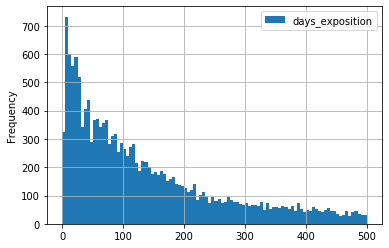

In [39]:
bad_values = [0, 30, 45, 60, 90]

good_realty_days = realty.query('days_exposition not in @bad_values')
good_realty_days.plot(y='days_exposition', kind='hist', bins=100, grid=True, range = (0, 500))

plt.show()

**Вывод**

Больше всего объявлений публикуется в феврале-апреле и ноября. Меньше всего в январе, мае и декабре. В чаще всего объявление "висит" в течение 77 дней. Примерно на 45, 60 снимается с публикации очень много объявлений. 
Интересно еще что часть объявлений снимается с прожади в первые 7-10 дней и спустя месяц, можно объяснить это тем, что подобные объявления суперуспешные и их очень быстро продают. Есть объявления больше 1,5 лет - это уже необычно долгие продажи. Рекордное значение - 1580 дней или больше 4 лет. Вероятно, это объявление просто забыли снять с публикации. 

## <a id="influence">Влияние факторов на стоимость

Будем искать какие факторы больше всего влияют на стоимость квартиры. Для этого изучим, зависит ли цена от квадратного метра от площади, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

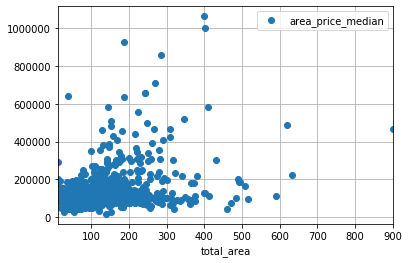

In [40]:
#Строим график по сводной таблице площадь-цена за квадратный метр
pivot_area_price = realty.pivot_table(index='total_area', values='price_metr', aggfunc='median')
pivot_area_price.columns = ['area_price_median']
pivot_area_price.plot(style='o', y='area_price_median',grid=True) 
plt.show()

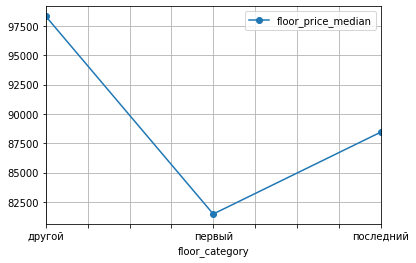

In [41]:
#Строим график по сводной таблице категория этажа-цена за квадратный метр
pivot_floor_price = realty.pivot_table(index='floor_category', values='price_metr', aggfunc='median')
pivot_floor_price.columns = ['floor_price_median']
pivot_floor_price.plot(style='o-', y='floor_price_median',grid=True) 
plt.show()

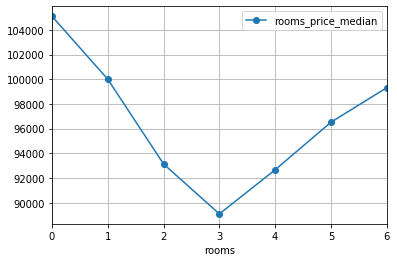

In [42]:
#Строим график по сводной таблице количества комнат-цена за квадратный метр
#Ограничем наш график 6 комнатами
pivot_rooms_price = realty.query('rooms <= 6').pivot_table(index='rooms', values='price_metr', aggfunc='median')
pivot_rooms_price.columns = ['rooms_price_median']
pivot_rooms_price.plot(style='o-', y='rooms_price_median',grid=True) 
plt.show()

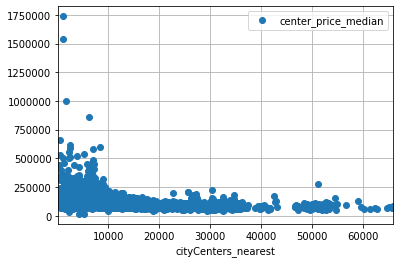

In [43]:
#Строим график по сводной таблице удалённости от центра-цена за квадратный метр
pivot_center_price = (realty
                      .query('cityCenters_nearest != 0')
                      .pivot_table(index='cityCenters_nearest', values='price_metr', aggfunc='median')
                     )
pivot_center_price.columns = ['center_price_median']
pivot_center_price.plot(style='o', y='center_price_median',grid=True) 
plt.show()

Построим матрицу корреляции

In [44]:
cols = ['last_price','price_metr', 'total_area', 'rooms','floor', 'cityCenters_nearest']
# по floor_category не строим корреляцию,разные форматы
realty[cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,last_price,price_metr,total_area,rooms,floor,cityCenters_nearest
last_price,1,0.75,0.64,0.36,0.026,-0.054
price_metr,0.75,1,0.31,0.058,0.13,0.026
total_area,0.64,0.31,1,0.77,-0.026,-0.082
rooms,0.36,0.058,0.77,1,-0.15,-0.062
floor,0.026,0.13,-0.026,-0.15,1,0.056
cityCenters_nearest,-0.054,0.026,-0.082,-0.062,0.056,1


По текущим графикам и матрице корреляции можно сделать следующие выводы: цена за квадратныый метр снижается от однокомнатных к трехкомнатным.  цена сильно зависит от категории этажа. Так стоимость за квадратный метр квартир на первом этаже ниже чем на последнем и еще ниже чем на других этажах. В графике зависимости цены от расстояния от цетра есть разрыв на 4,5 км.

### <a id="influence_data">Зависимость от даты

Изучим зависимость цены от даты размещения: дня недели, месяца и года.

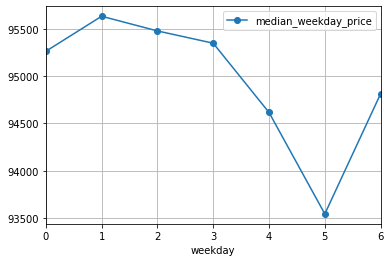

In [45]:
pivot_weekday_price = realty.pivot_table(index='weekday', values='price_metr', aggfunc=['median','count'])
pivot_weekday_price.columns = ['median_weekday_price','count_weekday_price']
pivot_weekday_price.plot(style='o-', y='median_weekday_price',grid=True) 
plt.show()

In [46]:
#расчет коэффициента корреляции
realty['price_metr'].corr(realty['weekday'])

-0.00736937689962862

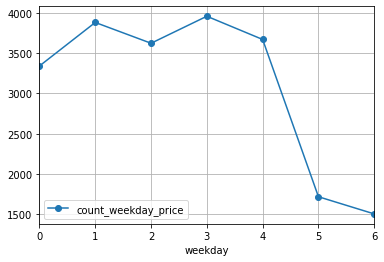

In [47]:
#Зависимость количества объявлений в зависимости от дня недели
pivot_weekday_price.plot(style='o-', y='count_weekday_price',grid=True) 
plt.show()

Делаем вычисления по месяцу

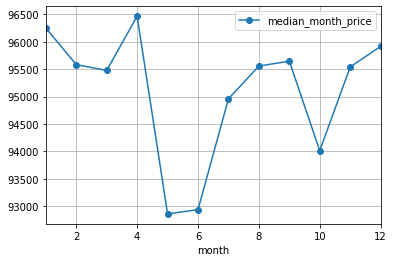

In [48]:
pivot_month_price = realty.pivot_table(index='month', values='price_metr', aggfunc='median')
pivot_month_price.columns = ['median_month_price']
pivot_month_price.plot(style='o-', y='median_month_price',grid=True) 
plt.show()

Делаем вычисления по году

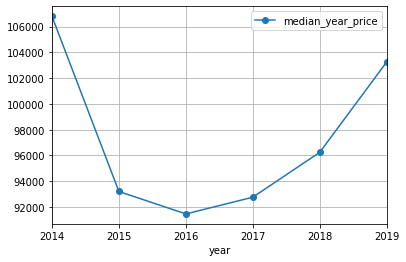

In [49]:
pivot_year_price = realty.pivot_table(index='year', values='price_metr', aggfunc=['median','count'])
pivot_year_price.columns = ['median_year_price','count_year_price']
pivot_year_price.plot(style='o-', y='median_year_price',grid=True) 
plt.show()


В выходные дни публикуется меньше всего объявлений. Очень низкий коэффициент корреляции стоимости квадратного метра от дня недели. Можно сказать, что квартиры стоят одинаково в понедельник или субботу.
Судя по графику, стоимость квадратного метра снижается  в мае и июне. Возможно, люди хотят поскорее продать квартиры, чтобы отдыхать летом, поэтому снижают стоимость. Наблюдается снижение стоимости в октябре, можно также объяснить тем, что люди стремятся завершить продажу к новому году.
По графику зависимости стоимости квадратного метра от года публикации объявления о продаже можно судить о кризисе рынка недвижимости (и вцелом экономики) в 2014-2016 годах. Тогда стоимость квадратного метра резко снижалась и только после 2016 года динамика изменилась.

## <a id="top10">ТОП 10 населенных пунктов

Сделаем отбор 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [50]:
#топ 10 населенных пунктов в объявлениях
realty['locality_name'].value_counts().head(10) 

Санкт-Петербург      14532
посёлок Мурино         461
посёлок Шушары         403
Всеволожск             371
Пушкин                 345
Колпино                328
посёлок Парголово      301
Гатчина                292
деревня Кудрово        262
Петергоф               197
Name: locality_name, dtype: int64

In [51]:
#создадим список населенных пунктов
top10 = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 
         'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Петергоф']

#создаем сводную таблицу по стоимости квадратного метра
pivot_top10 = (realty
               .query('locality_name in @top10')
               .pivot_table(index='locality_name', values='price_metr', aggfunc=['mean','count'])
              )
pivot_top10.columns = ['mean_price','count_realty']

#округляем и выводим по убыванию
pivot_top10.round().sort_values(by = 'mean_price', ascending =False)

,mean_price,count_realty
locality_name,,
Санкт-Петербург,114233.0,14532
Пушкин,103428.0,345
деревня Кудрово,92702.0,262
посёлок Парголово,90443.0,301
посёлок Мурино,86366.0,461
Петергоф,84481.0,197
посёлок Шушары,78750.0,403
Колпино,75344.0,328
Всеволожск,68880.0,371


Самая высокая стоимость стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге, а самая низкая - в Гатчине.

## <a id="centr_piter">Квартиры в центре Санкт-Петербурга

Выделим квартиры в Санкт-Петербурге. Для начала определим, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Результат представим на графике: он должен показывать, как цена зависит от удалённости от центра. 
Одна из задач - определить границу, где график сильно меняется — это и будет центральная зона.

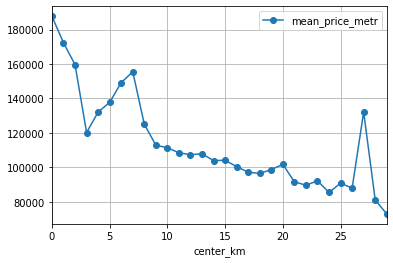

In [52]:
#создаем столбец удаленности от центра в км
realty['center_km'] = (realty['cityCenters_nearest'] / 1000).round()

#делаем сводную таблицу по срезу
pivot_spb_center = (realty
                    .query('locality_name == "Санкт-Петербург" and locality_name != 0')
                    .pivot_table(index='center_km', values='price_metr', aggfunc='mean')
                   )
pivot_spb_center.columns = ['mean_price_metr']

pivot_spb_center.plot(style='o-', y='mean_price_metr',grid=True)
plt.show()

Можно сказать, что стоимось квадратного метра для кварти дальше 7 км от центра снижается. И действительно в этот диаметр попадаю такие районы как Центральный, Адмиралтейски, Василеостровский и Петроградский.
Можно еще отметить, наблюдается снижение относительно максимального значений для квартим ближе 3км от центра. Это можно объяснить тем, что в самом центре Санкт-Петербургк не так удобно как кажется нет достаточно мест для детей, часто шумно, недостаточно больщих прдуктовых магазинов. А также в центр СПб много коммунальных квартир, которые просто не все могут сразу выкупить, плюс в них нужно очень сильно вкладываться в плане ремонта. 

## Анализ квартир в центре Санкт-Петербурга

Дополнительно проанализируем сегмент квартир в центре. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [53]:
# выделим сегмент квартир в центре СПб
realty_spb_center = realty.query('locality_name == "Санкт-Петербург" and center_km < 7')

In [54]:
realty_spb_center['total_area'].describe()

count    2882.000000
mean       93.419126
std        58.054453
min        12.000000
25%        58.000000
50%        80.000000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

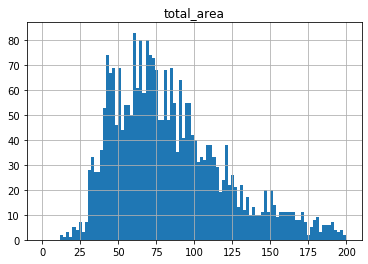

In [55]:
#график общей площади квартир в центре СПб
realty_spb_center.hist('total_area', bins= 100, range=(0,200))
plt.show()

Средняя площадь квартир в центре больше общего распределения.

In [56]:
#Смотрим стоимость квартир в центре СПб
realty_spb_center['last_price'].describe().apply('{0:.5f}'.format)

count         2882.00000
mean      14631756.20958
std       25138309.70105
min        1600000.00000
25%        6700000.00000
50%        9200000.00000
75%       13990000.00000
max      763000000.00000
Name: last_price, dtype: object

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


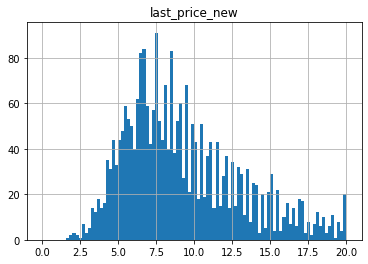

In [57]:
#график стоимости квартир в центре СПб
realty_spb_center['last_price_new'] = realty_spb_center['last_price'] / 1000000
realty_spb_center.hist('last_price_new', bins= 100, range=(0,20))
plt.show()

Средняя стоимость квартир в центре выше. Самая дорогая квартира нашего исследования находится здесь

In [58]:
#Смотрим число комнат квартир в центре СПб
realty_spb_center['rooms'].describe()

count    2882.000000
mean        2.894865
std         1.497788
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

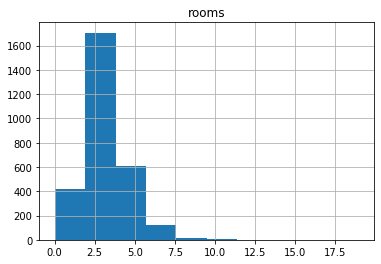

In [59]:
#график количества комнат в центре СПб
realty_spb_center.hist('rooms', bins= 10)
plt.show()

Вывод по коичеству комнат

In [60]:
#Смотрим число комнат квартир в центре СПб
realty_spb_center['ceiling_height'].describe()

count    2882.000000
mean        3.016985
std         0.792067
min         2.400000
25%         2.720000
50%         3.000000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

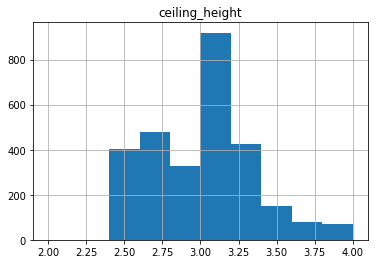

In [61]:
#график высоты потолков в центре СПб
realty_spb_center.hist('ceiling_height', bins= 10, range= (2,4))
plt.show()

В центре много квартир с высокими потолками.

Веделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, дата размещения объявления). Удалённость от центра не будем рассматривать, так как квартиры уже в центре. Постоим для этого матрицу корреляции.

In [62]:
cols2 = ['last_price','price_metr', 'total_area', 'rooms']
realty_spb_center[cols2].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,last_price,price_metr,total_area,rooms
last_price,1,0.82,0.59,0.3
price_metr,0.82,1,0.25,-0.0068
total_area,0.59,0.25,1,0.76
rooms,0.3,-0.0068,0.76,1


**Вывод**

Средняя площадь квартир в центре больше чем в общей базе данных, наблюдается смещение медианного значение с 52 до 80 кв.метров. Стоимость большинства квартир в в центре больше почти в два разаю. Нужно также сказать, что в центре Санкт-петербурга преобладают продажи многокомнатных квартир (3-4 комнаты), этим может также обуславливаться, что их стоимость выше. Высота потолков в квартирах у центре выше среднего по выборке. Все это можно объяснить тем, что в центре Петербурга много дореволюционных домов с высокими потолками, которые были переоборудованы в коммунальные квартиры. 

### <a id="finish">Шаг 5. Общий вывод

В ходе нашего исследования были проанализированы данные из объявлений о продаже квартир с 2014 по 2019 год в Санкт-Петербурге и ближайших пригородах. Для этого данные были предобработаны, произведены дополнительные расчеты и были построены графики для анализа параметров при продаже квартир. 
Нами были сделаны следующие выводы:
* Большинство квартир в наших данных 40-69 квадратных метров. Стоимость квартир очень вариативна. Можно сказать, что средняя стоимость квартир 3,5-6 млн.рублей. По количеству комнат объявления по продаже квартир больше четырех комнат - редкость. Высота потолков в большинстве случаев 2,6-2,8 метров.
* Цена за квадратный метр снижается от однокомнатных к трехкомнатным. Цена сильно зависит от категории этажа. Так стоимость за квадратный метр квартир на первом этаже ниже чем на последнем и еще ниже чем на других этажах.
* Больше всего объявлений публикуется в феврале-апреле и ноября. Меньше всего в январе, мае и декабре. Чаще всего объявление "висит" в течение 77 дней. Примерно на 45, 60 снимается с публикации очень много объявлений. Интересно еще что часть объявлений снимается с продажи в первые 7-10 дней и спустя месяц, можно объяснить это тем, что подобные объявления суперуспешные и их очень быстро продают. Есть объявления больше 1,5 лет - это уже необычно долгие продажи.
* В выходные дни публикуется меньше всего объявлений. Стоимость квадратного метра снижается в мае и июне. Это можно объяснить тем, что люди хотят поскорее продать квартиры, чтобы отдыхать летом, поэтому снижают стоимость. Наблюдается снижение стоимости в октябре, также можно объяснить, что люди стремятся завершить продажу к новому году. По графику зависимости стоимости квадратного метра от года публикации объявления о продаже мы сделали вывод, что в 2014-2016 годах наблюдался кризис рынка недвижимости: резко снижалась цена на квартиры. 
* Нами был определён центр города в пределах 7 км.. Отметили, что наблюдается снижение относительно максимального значений для квартир ближе 3км от центра.
* Средняя площадь квартир в центре Санкт-Петербурга больше чем в общей базе данных. Стоимость большинства квартир в центре больше почти в два раза. Нужно также сказать, что в центре Санкт-Петербурга преобладают продажи многокомнатных квартир (3-4 комнаты), этим может также обуславливаться, что их стоимость выше. Высота потолков в квартирах в центре выше среднего по выборке. Мы объясняем это тем, что в центре Петербурга много дореволюционных домов с высокими потолками, которые были переоборудованы в коммунальные квартиры.
